Extracted /content/srgdhgfhm/New folder.zip to 'images' folder.
Image: images/New folder/sim_2021_04_26_070201.JPG
Snow Detected: False
Blurry: False (Laplacian Variance: 2342.087520286803)
Darkened: False (Mean Intensity: 59.87768614969136)
----------------------------------------
Image: images/New folder/sim_2021_03_07_110201.JPG
Snow Detected: True
Blurry: False (Laplacian Variance: 13053.119403563582)
Darkened: False (Mean Intensity: 70.86545862268518)
----------------------------------------
Image: images/New folder/sim_2021_03_04_130201.JPG
Snow Detected: False
Blurry: False (Laplacian Variance: 9071.47752968298)
Darkened: False (Mean Intensity: 60.68121624228395)
----------------------------------------
Image: images/New folder/sim_2021_08_04_060201.JPG
Snow Detected: False
Blurry: True (Laplacian Variance: 136.07248421951437)
Darkened: True (Mean Intensity: 23.52455150462963)
----------------------------------------
Image: images/New folder/sim_2021_04_18_050201.JPG
Snow Detect

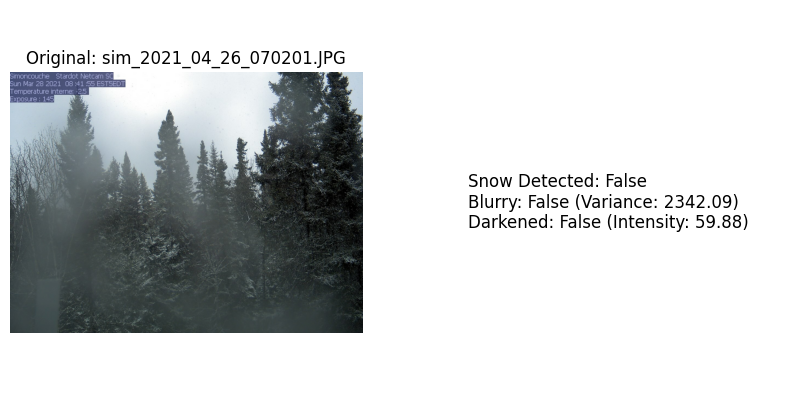

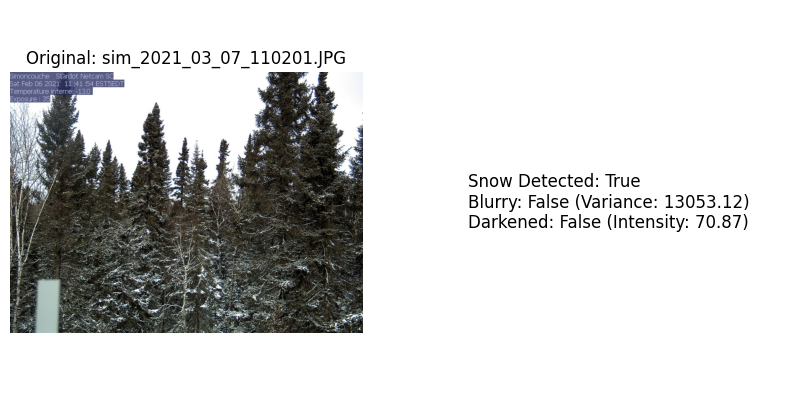

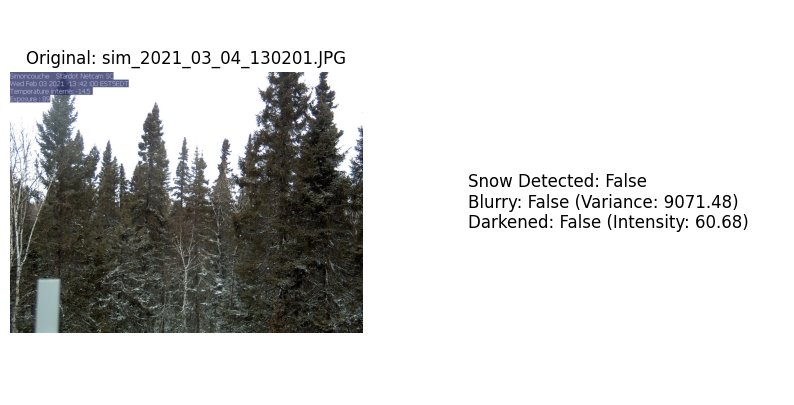

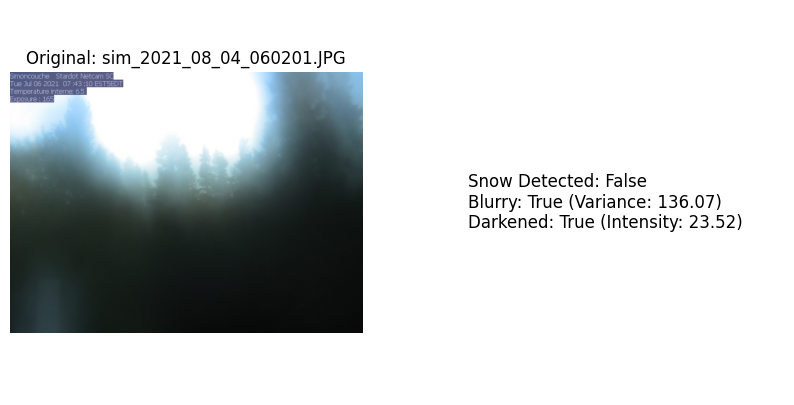

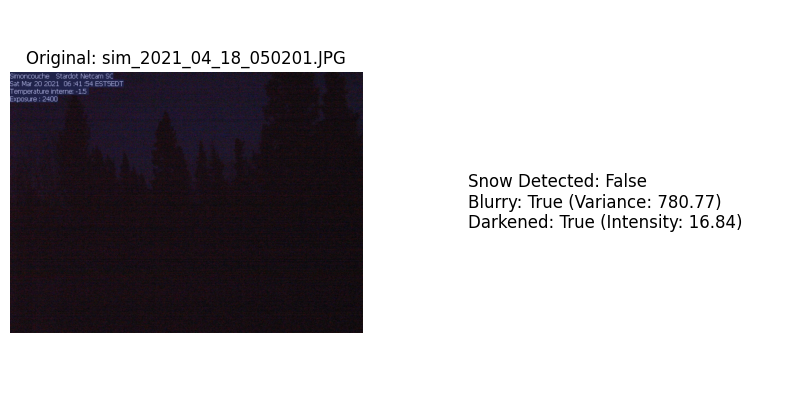

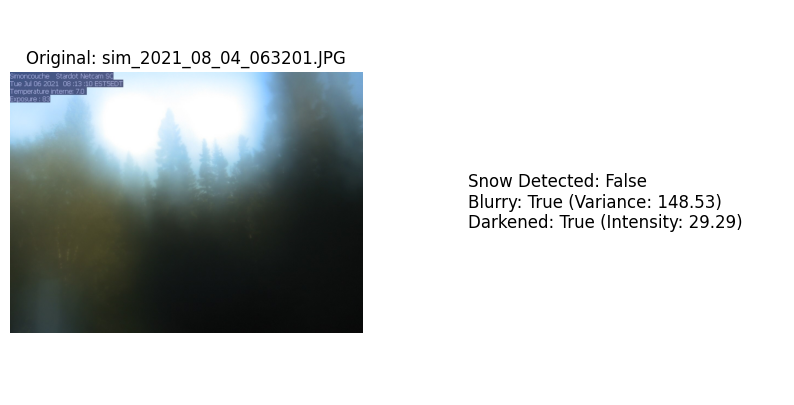

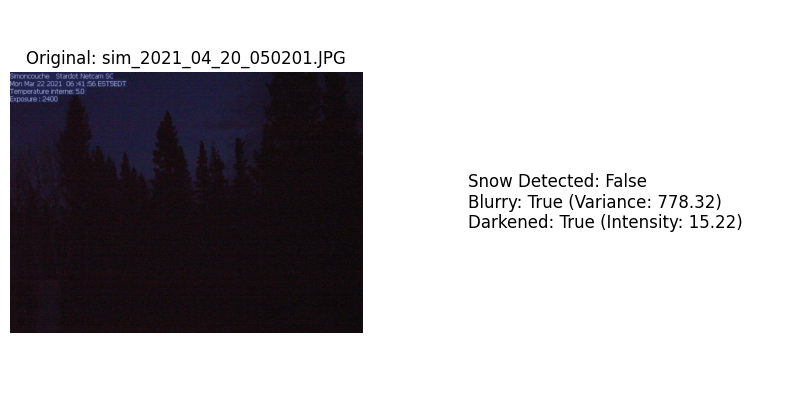

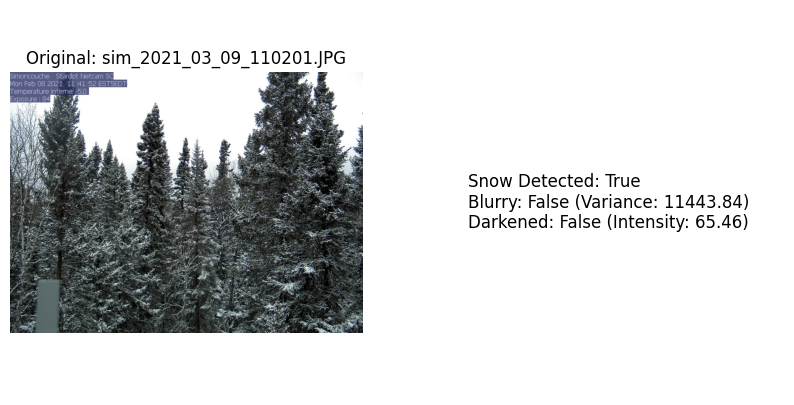

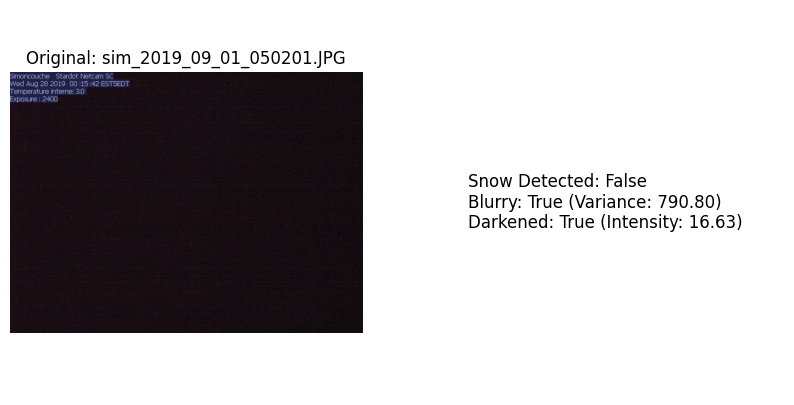

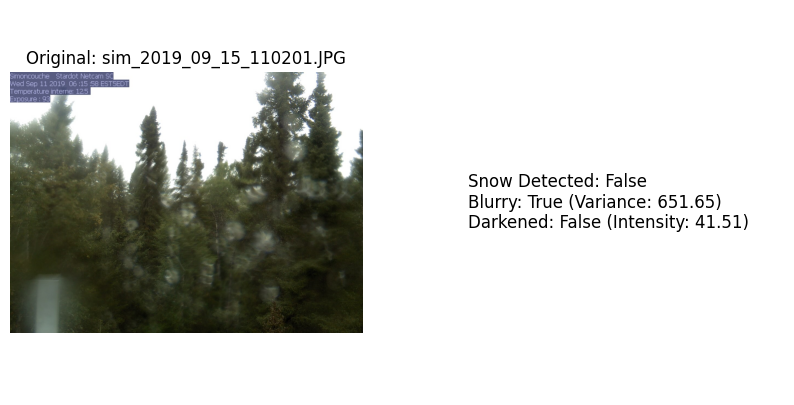

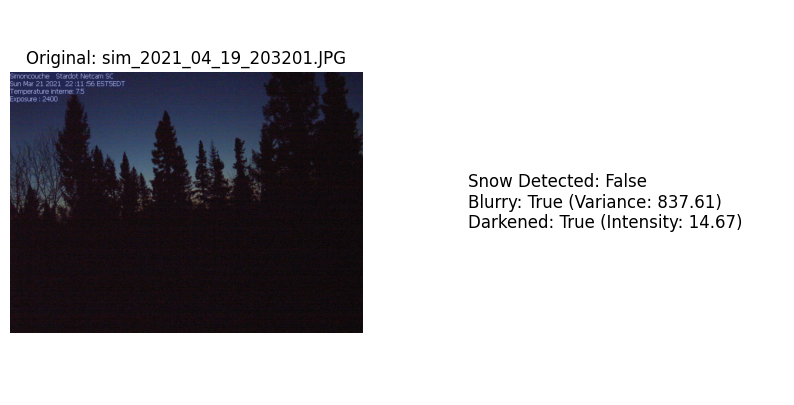

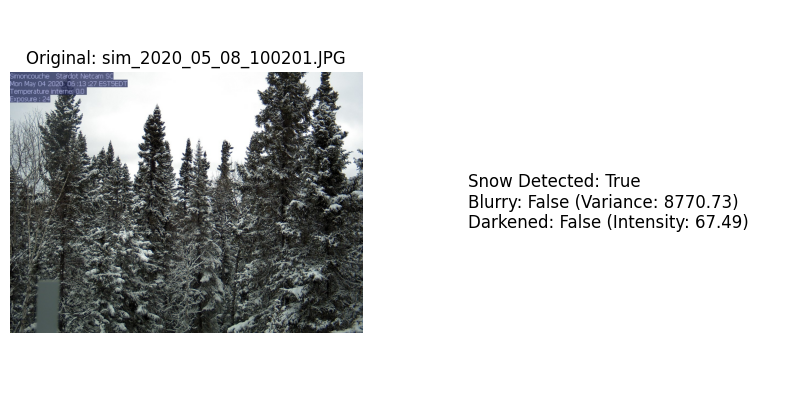

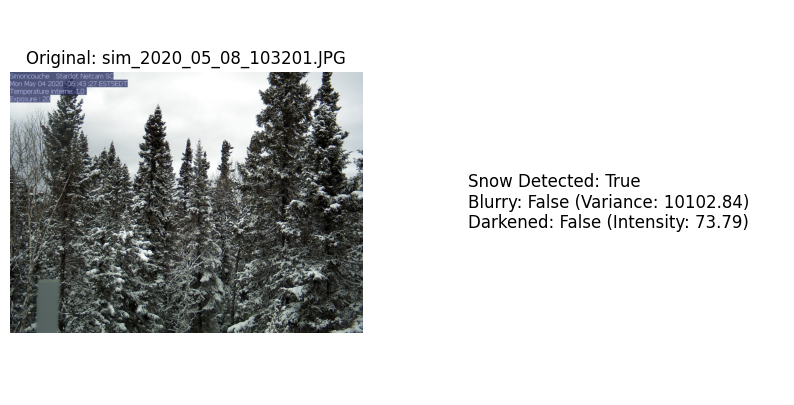

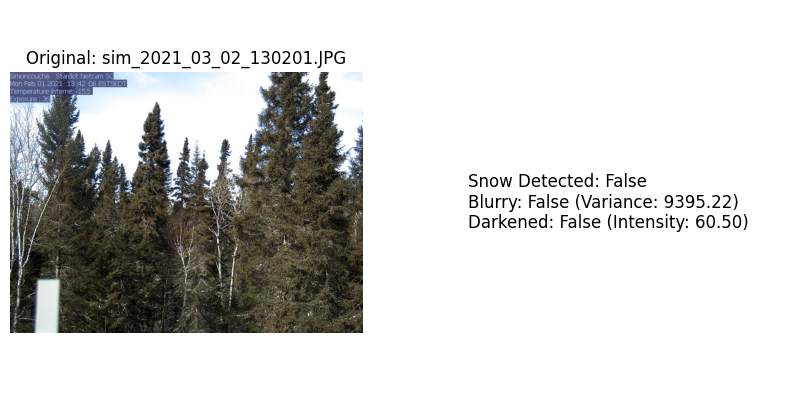

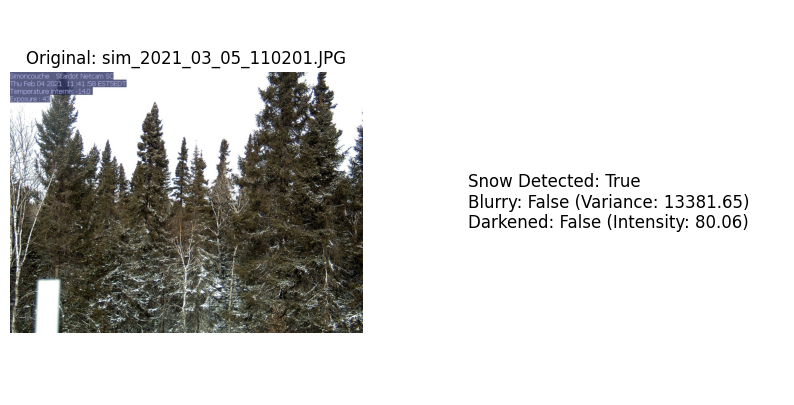

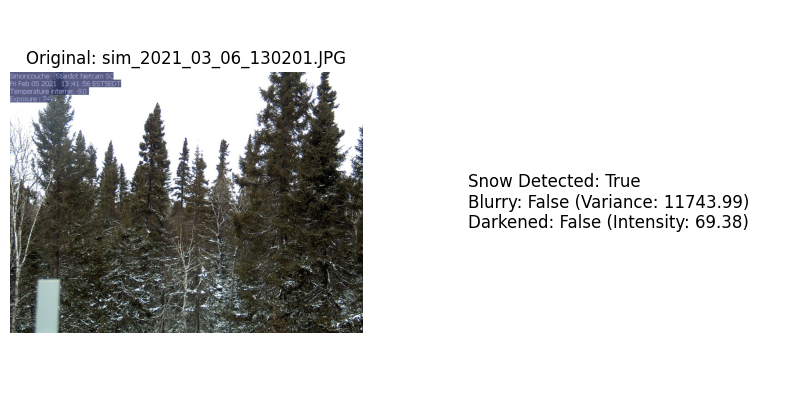

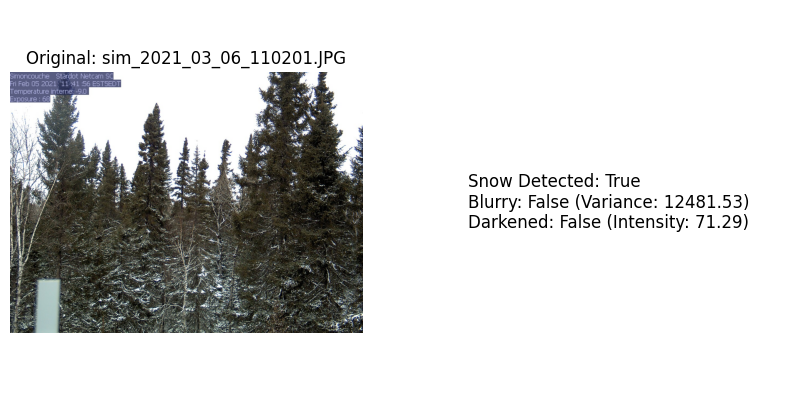

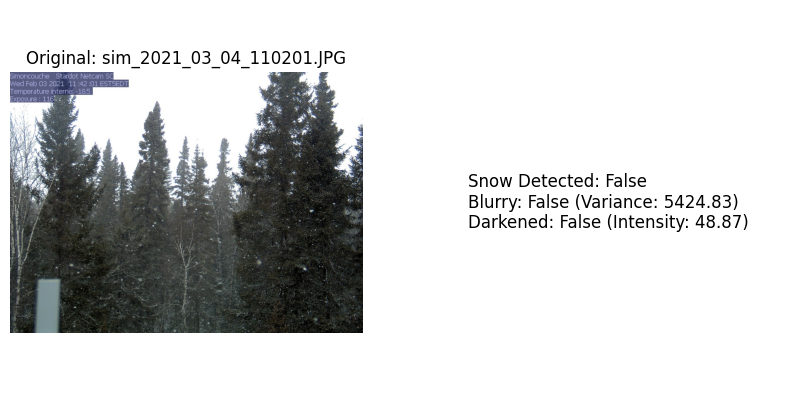

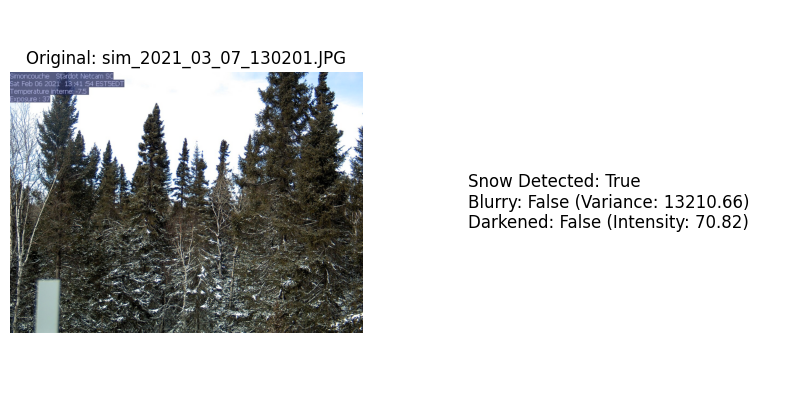

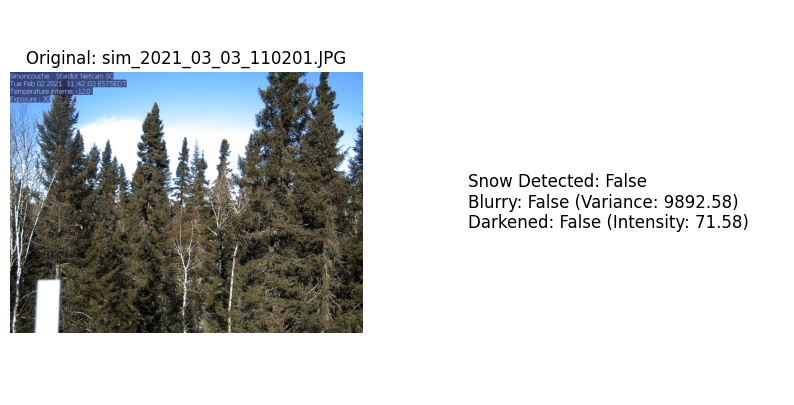

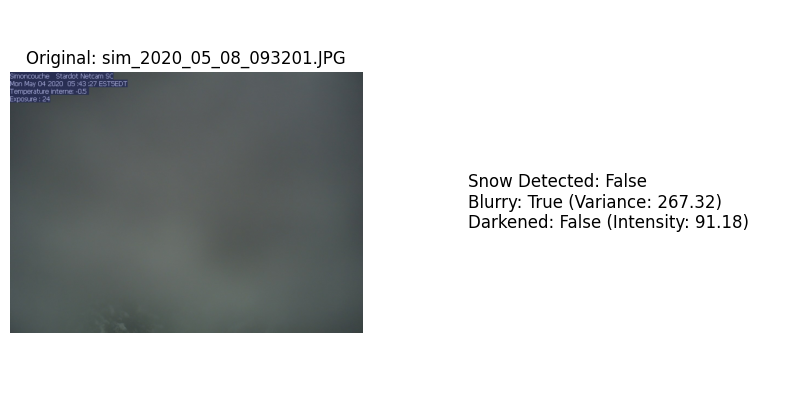

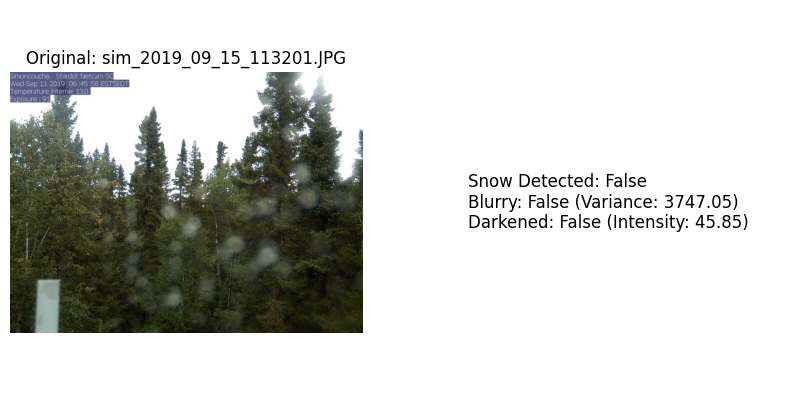

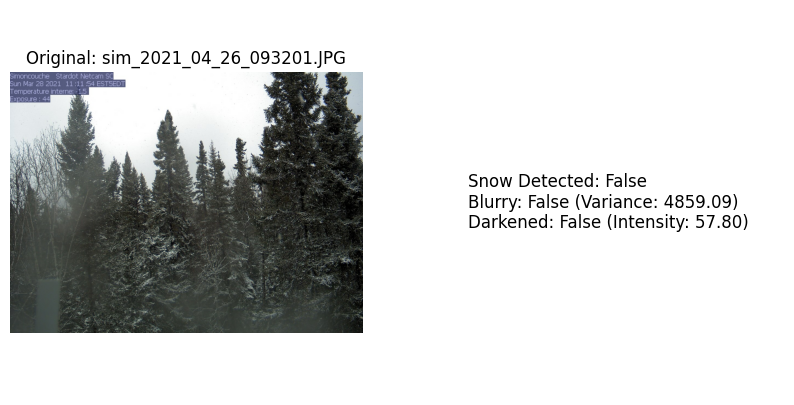

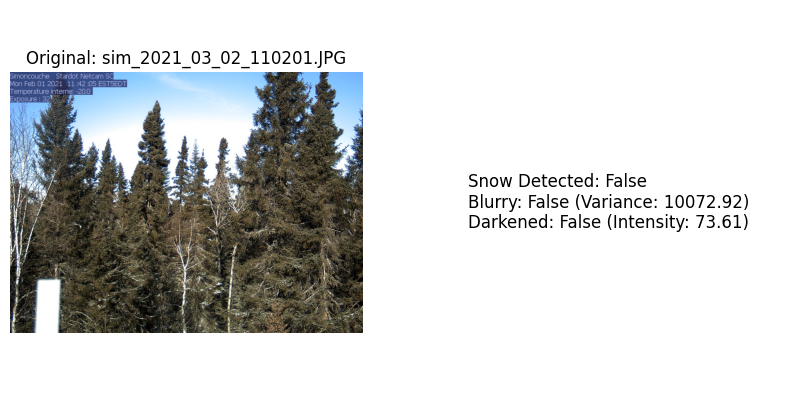

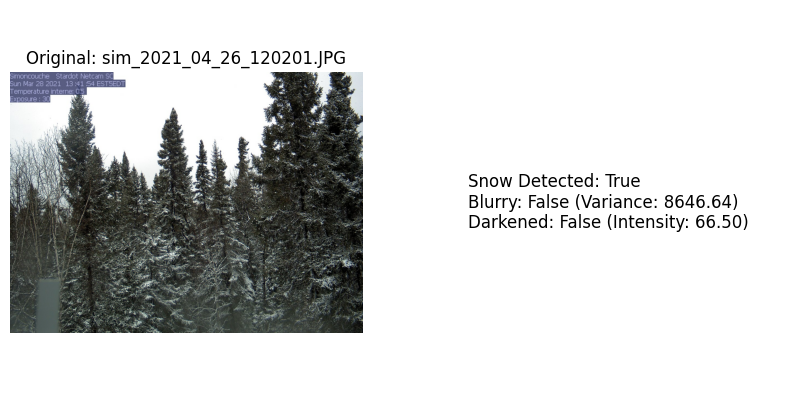

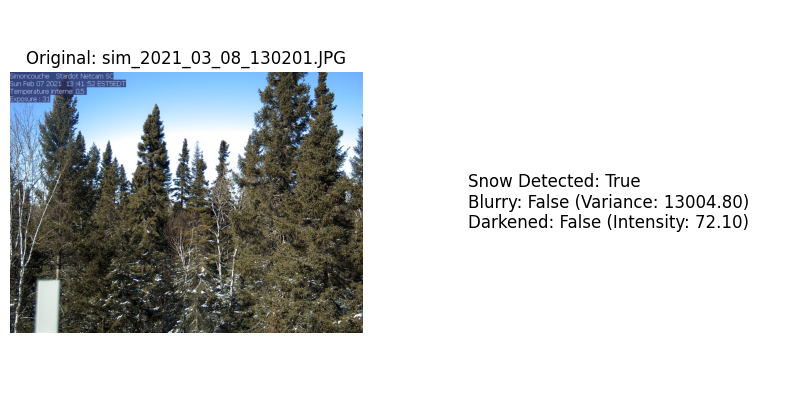

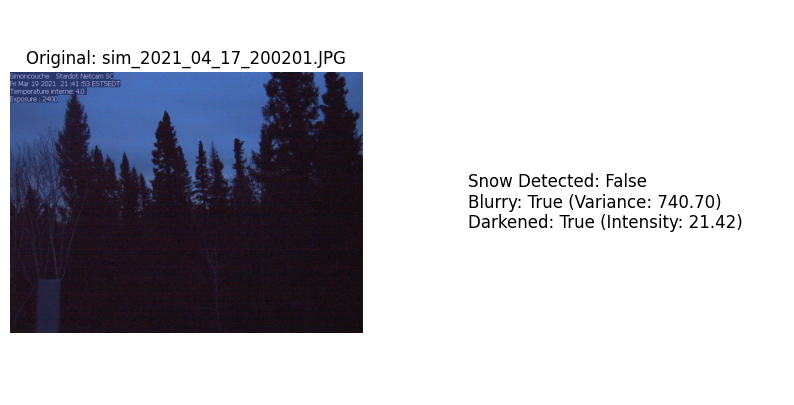

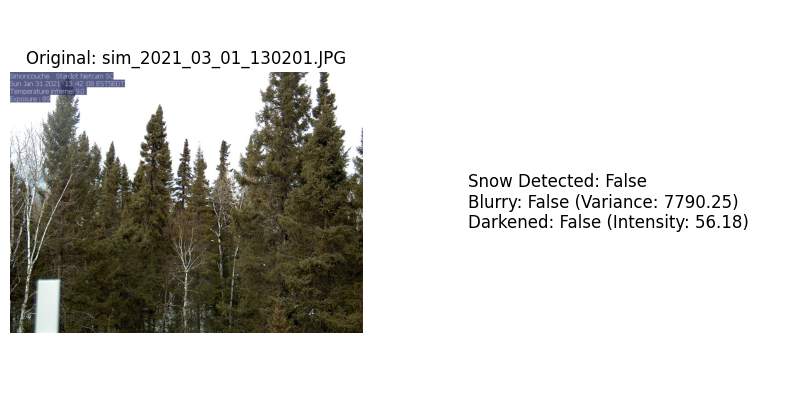

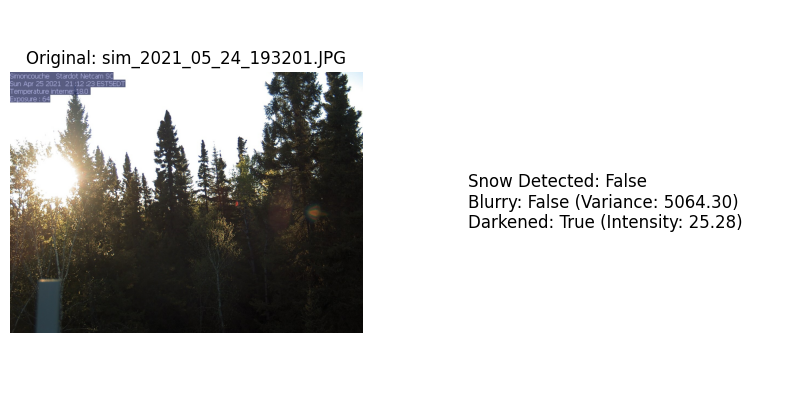

In [7]:
import cv2
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt

# Function to detect snow in the bottom 2/3 of an image
def detect_snow(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_snow = np.array([0, 0, 180], dtype=np.uint8)
    upper_snow = np.array([180, 25, 255], dtype=np.uint8)

    # Get the dimensions of the image
    height, width = image.shape[:2]

    # Define the region of interest (ROI)
    # Bottom half of the image (height-wise)
    start_row = int(height / 2)  # Start from the middle of the image height
    end_row = height  # End at the bottom of the image

    # Right one-third of the image (width-wise)
    start_col = int(2 * width / 3)  # Start from 2/3 of the image width
    end_col = width  # End at the right edge of the image

    # Create a mask for the bottom-right corner
    mask_bottom_right = np.zeros((height, width), dtype=np.uint8)
    mask_bottom_right[start_row:end_row, start_col:end_col] = 255  # Set the ROI to white (255)

    # Apply the snow detection only to the bottom-right corner
    snow_mask = cv2.inRange(hsv, lower_snow, upper_snow)
    snow_mask = cv2.bitwise_and(snow_mask, mask_bottom_right)  # Apply the ROI mask

    # Calculate the percentage of snow in the bottom-right corner
    snowy_percentage = np.sum(snow_mask == 255) / np.sum(mask_bottom_right == 255)

    return snowy_percentage > 0.0093, snow_mask

# Function to check if an image is blurry
def is_blurry(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    laplacian_var = laplacian.var()
    return laplacian_var < 1000, laplacian_var

# Function to check if the bottom third of an image is darkened
def is_darkened(image):
    height = image.shape[0]
    bottom_third = image[int(height * (2 / 3)):, :]
    gray = cv2.cvtColor(bottom_third, cv2.COLOR_BGR2GRAY)
    mean_intensity = np.mean(gray)
    return mean_intensity < 30, mean_intensity

# Function to process all images in a folder
def process_images_in_folder(folder_path):
    results = {}
    for root, dirs, files in os.walk(folder_path):
        for filename in files:
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                image_path = os.path.join(root, filename)
                image = cv2.imread(image_path)
                if image is not None:
                    snow_result, snow_mask = detect_snow(image)
                    blurry_result, laplacian_var = is_blurry(image)
                    darkened_result, mean_intensity = is_darkened(image)

                    results[image_path] = {
                        'snow': snow_result,
                        'blurry': blurry_result,
                        'darkened': darkened_result,
                        'snow_mask': snow_mask,
                        'laplacian_var': laplacian_var,
                        'mean_intensity': mean_intensity
                    }

                    print(f"Image: {image_path}")
                    print(f"Snow Detected: {snow_result}")
                    print(f"Blurry: {blurry_result} (Laplacian Variance: {laplacian_var})")
                    print(f"Darkened: {darkened_result} (Mean Intensity: {mean_intensity})")
                    print("-" * 40)
                else:
                    print(f"Could not read image: {image_path}")
    return results

# Function to extract ZIP file
def extract_zip(zip_path, extract_to='images'):
    if not os.path.exists(zip_path):
        print(f"ZIP file '{zip_path}' not found.")
        return None

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
        print(f"Extracted {zip_path} to '{extract_to}' folder.")

    return extract_to

# Function to display results
def display_images_with_results(results):
    for image_path, result in results.items():
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 5))

        # Original image
        plt.subplot(1, 2, 1)
        plt.imshow(image_rgb)
        plt.title(f"Original: {os.path.basename(image_path)}")
        plt.axis('off')

        # Filter results
        plt.subplot(1, 2, 2)
        plt.text(0.1, 0.5,
                 f"Snow Detected: {result['snow']}\n"
                 f"Blurry: {result['blurry']} (Variance: {result['laplacian_var']:.2f})\n"
                 f"Darkened: {result['darkened']} (Intensity: {result['mean_intensity']:.2f})",
                 fontsize=12, va='center')
        plt.axis('off')

        plt.show()

# Main function
def main():
    zip_path = '/content/srgdhgfhm/New folder.zip'  # <-- Direct ZIP file path
    folder_path = extract_zip(zip_path)

    if folder_path is None:
        print("Extraction failed. Exiting.")
        return

    results = process_images_in_folder(folder_path)

    print("\nDisplaying images with filter results:")
    display_images_with_results(results)

# Run the script
if __name__ == "__main__":
    main()
